# Rate Distortion

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import _lib.pr_func as pr
from _lib.utility import *
%config InlineBackend.figure_format = 'retina'
sns.set()

### Setup

In [33]:
# dimensions
N,K = 20,20
pr.set_dims([('w',N),('a',K)])

# environment
U = pr.func(vars=['w','a'],val=gauss_utility(N,K,sigma=4.0))
pw = pr.func(vars=['w'],val='unif').normalize()

def Blahut_Arimoto_iterations(U,beta):

    # initializations
    pa = pr.func(vars=['a'], val='unif').normalize()
    pagw_temp = 0

    # BA iteration
    for i in range(0,10000):
        pagw = (pa*pr.exp(beta*U)).normalize(['a'])
        pa = pr.sum(pagw*pw,['a'])

        # stopping condition
        if np.linalg.norm(pagw.val-pagw_temp)<1e-10: break
        pagw_temp = pagw.val
    return pa,pagw

def show_prior_and_posterior(pa,pagw):
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0].bar(range(K),pa.val)
    ax[0].set_title('Prior')
    ax[0].set_ylabel('Probability',fontsize=10)
    ax[0].set_xlabel('Actions',fontsize=10)
    ax[1].pcolor(pagw.val,cmap="Greys")
    ax[1].set_title('Posterior')
    ax[1].set_ylabel("World states",fontsize=10)
    ax[1].set_xlabel("Actions",fontsize=10)
    fig.tight_layout(pad=5.0)
    plt.show()

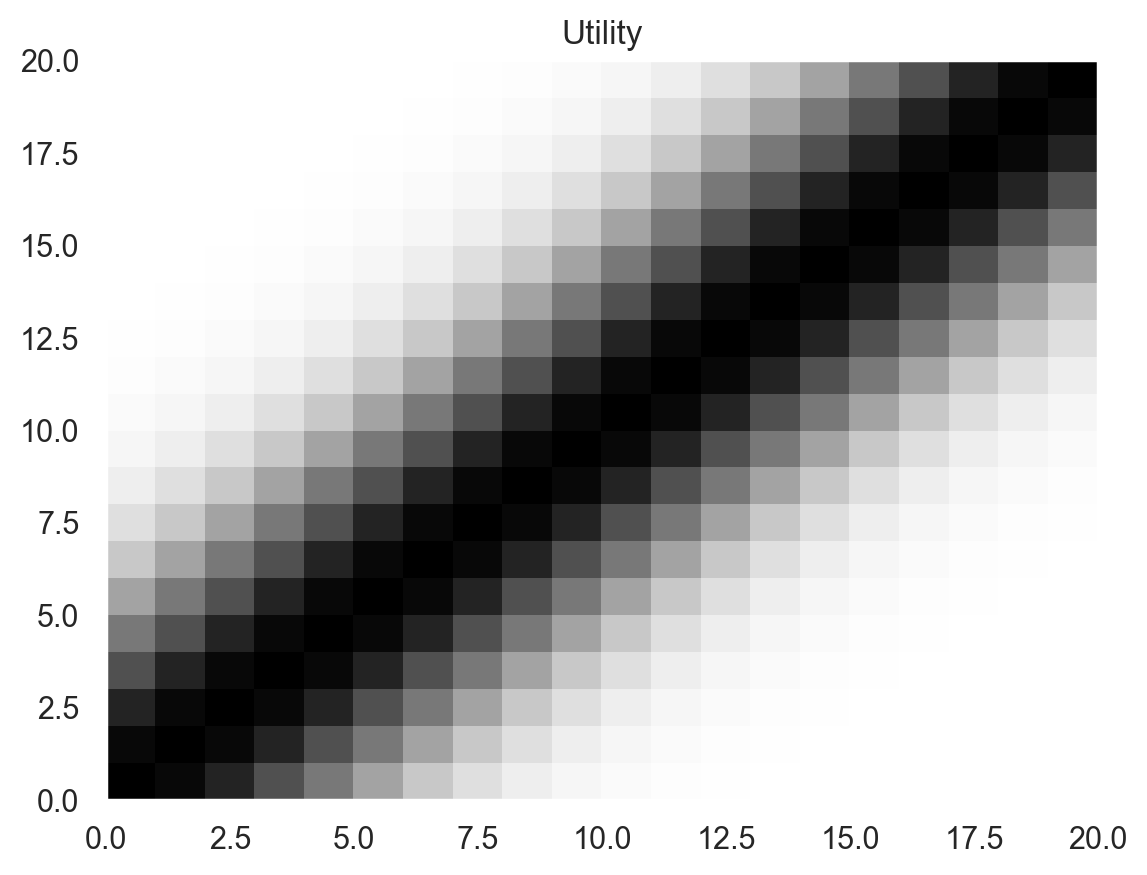

In [73]:
plt.pcolor(U.val, cmap="Greys")
plt.title("Utility")
plt.show()

### Results

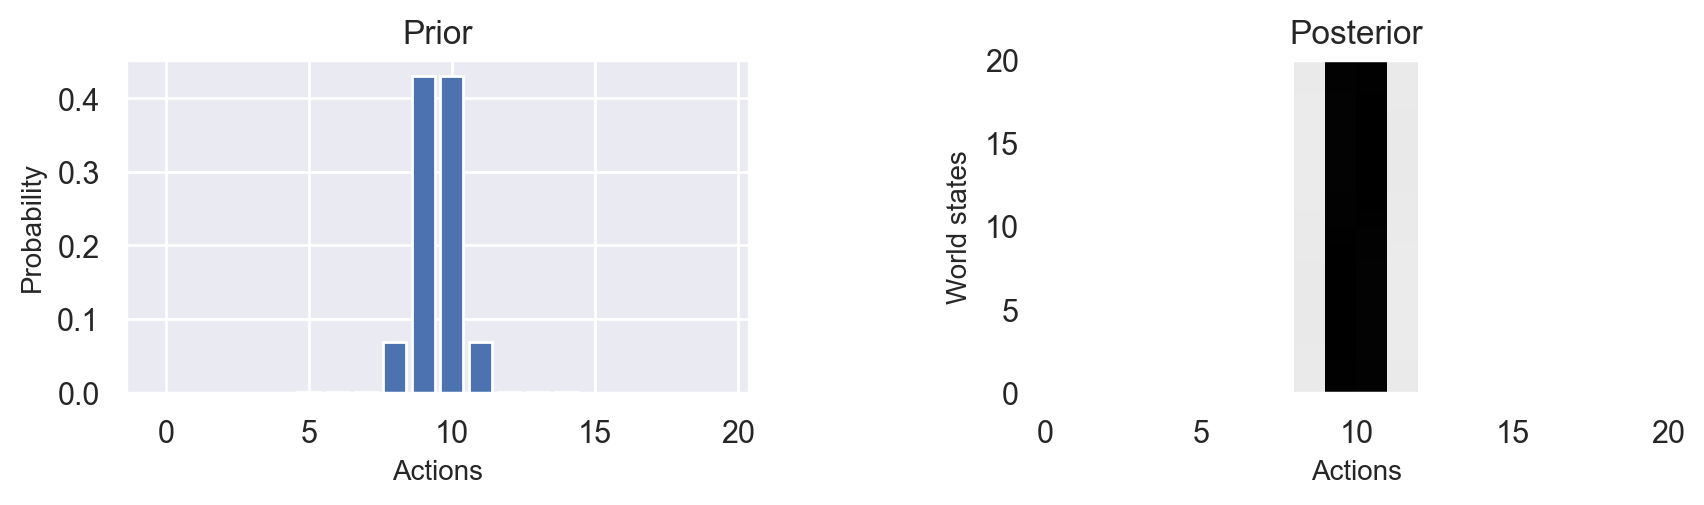

beta=0.1  ==>  DKL=0.000, EU=0.495, FE=0.495


In [65]:
beta = .1
pa,pagw = Blahut_Arimoto_iterations(U,beta)
show_prior_and_posterior(pa,pagw)

# calc and print stats
DKL = pr.sum(pw*pagw*pr.log(pagw/pa)).val/np.log(2)   # average information-processing costs
EU = pr.sum(pw*pagw*U).val                            # expected utility
FE = EU - DKL/beta                                    # free energy
print("beta={}  ==>  DKL={:.3f}, EU={:.3f}, FE={:.3f}".format(beta,DKL,EU,FE))

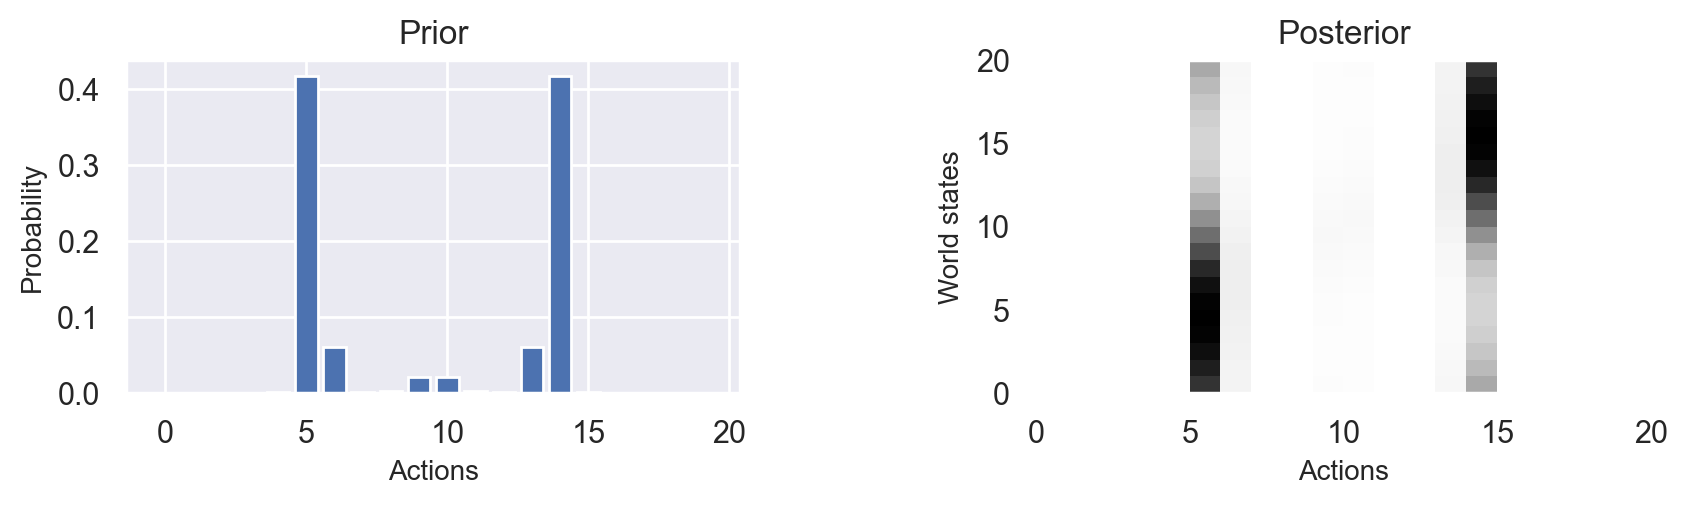

beta=1.4  ==>  DKL=0.146, EU=0.614, FE=0.509


In [61]:
beta = 1.4
pa,pagw = Blahut_Arimoto_iterations(U,beta)
show_prior_and_posterior(pa,pagw)

# calc and print stats
DKL = pr.sum(pw*pagw*pr.log(pagw/pa)).val/np.log(2)   # average information-processing costs
EU = pr.sum(pw*pagw*U).val                            # expected utility
FE = EU - DKL/beta                                    # free energy
print("beta={}  ==>  DKL={:.3f}, EU={:.3f}, FE={:.3f}".format(beta,DKL,EU,FE))

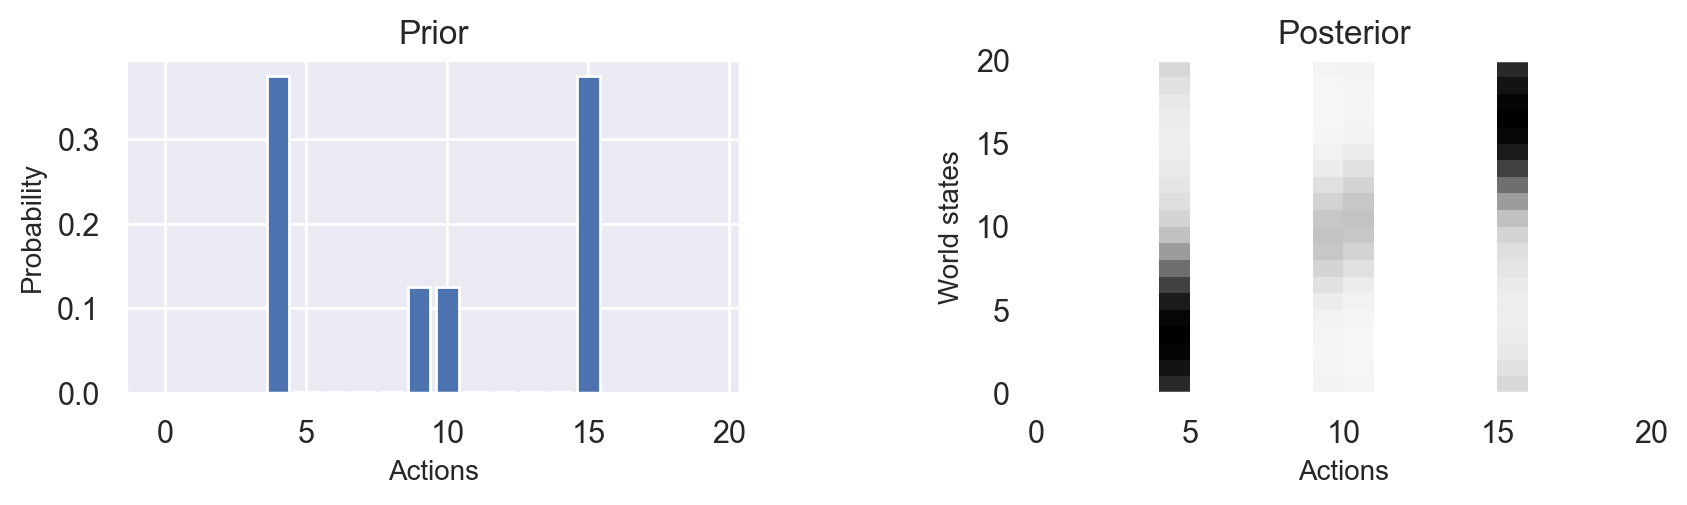

beta=2.0  ==>  DKL=0.317, EU=0.683, FE=0.525


In [55]:
beta = 2.0
pa,pagw = Blahut_Arimoto_iterations(U,beta)
show_prior_and_posterior(pa,pagw)

# calc and print stats
DKL = pr.sum(pw*pagw*pr.log(pagw/pa)).val/np.log(2)   # average information-processing costs
EU = pr.sum(pw*pagw*U).val                            # expected utility
FE = EU - DKL/beta                                    # free energy
print("beta={}  ==>  DKL={:.3f}, EU={:.3f}, FE={:.3f}".format(beta,DKL,EU,FE))

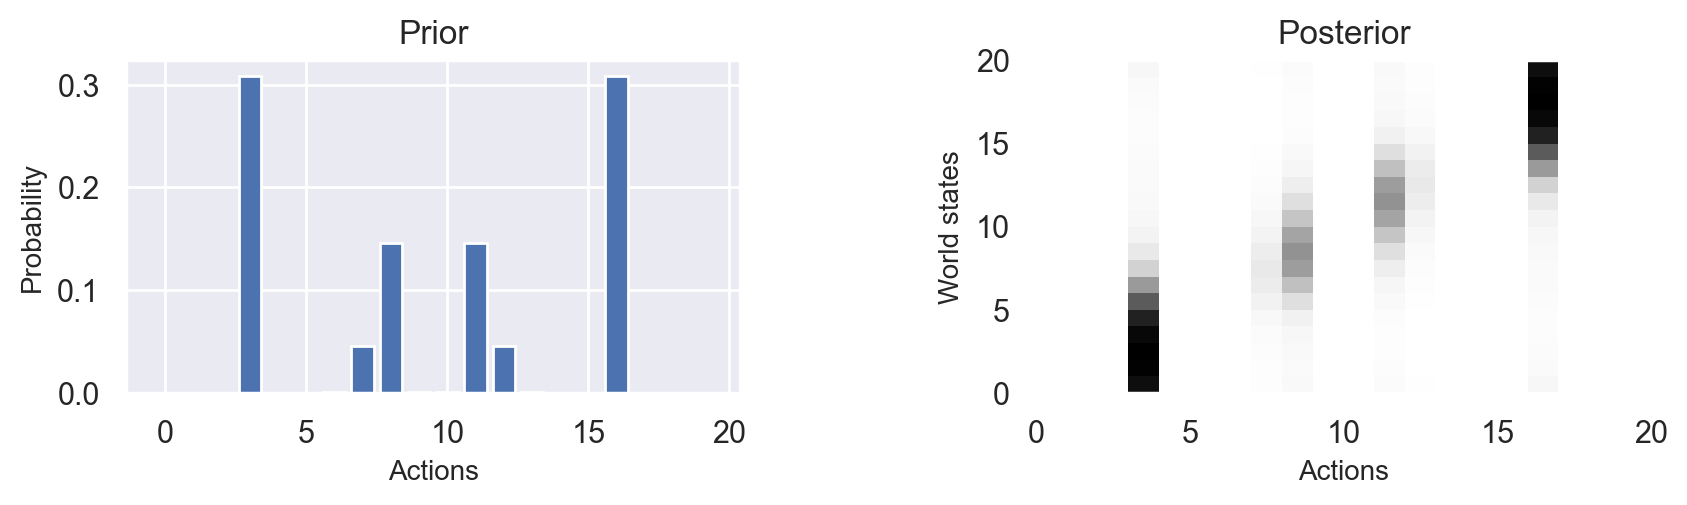

beta=3.5  ==>  DKL=0.803, EU=0.809, FE=0.579


In [58]:
beta = 3.5
pa,pagw = Blahut_Arimoto_iterations(U,beta)
show_prior_and_posterior(pa,pagw)

# calc and print stats
DKL = pr.sum(pw*pagw*pr.log(pagw/pa)).val/np.log(2)   # average information-processing costs
EU = pr.sum(pw*pagw*U).val                            # expected utility
FE = EU - DKL/beta                                    # free energy
print("beta={}  ==>  DKL={:.3f}, EU={:.3f}, FE={:.3f}".format(beta,DKL,EU,FE))

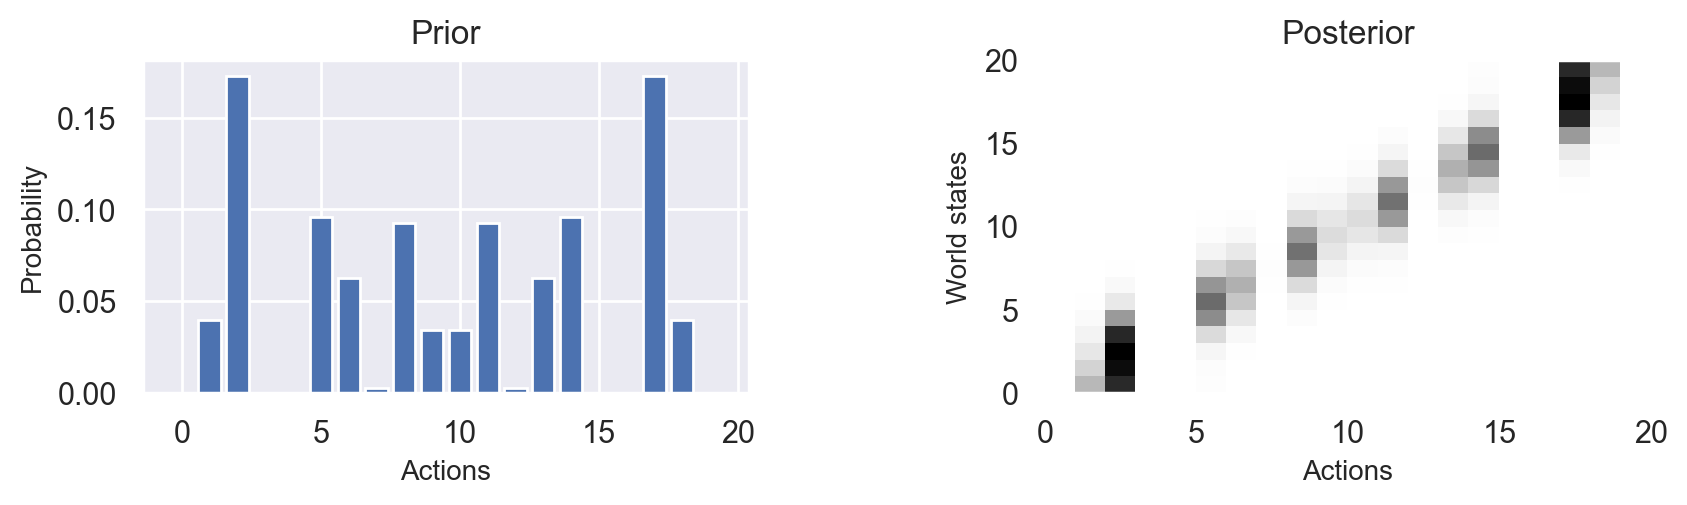

beta=8.0  ==>  DKL=1.702, EU=0.932, FE=0.719


In [76]:
beta = 8.0
pa,pagw = Blahut_Arimoto_iterations(U,beta)
show_prior_and_posterior(pa,pagw)

# calc and print stats
DKL = pr.sum(pw*pagw*pr.log(pagw/pa)).val/np.log(2)   # average information-processing costs
EU = pr.sum(pw*pagw*U).val                            # expected utility
FE = EU - DKL/beta                                    # free energy
print("beta={}  ==>  DKL={:.3f}, EU={:.3f}, FE={:.3f}".format(beta,DKL,EU,FE))

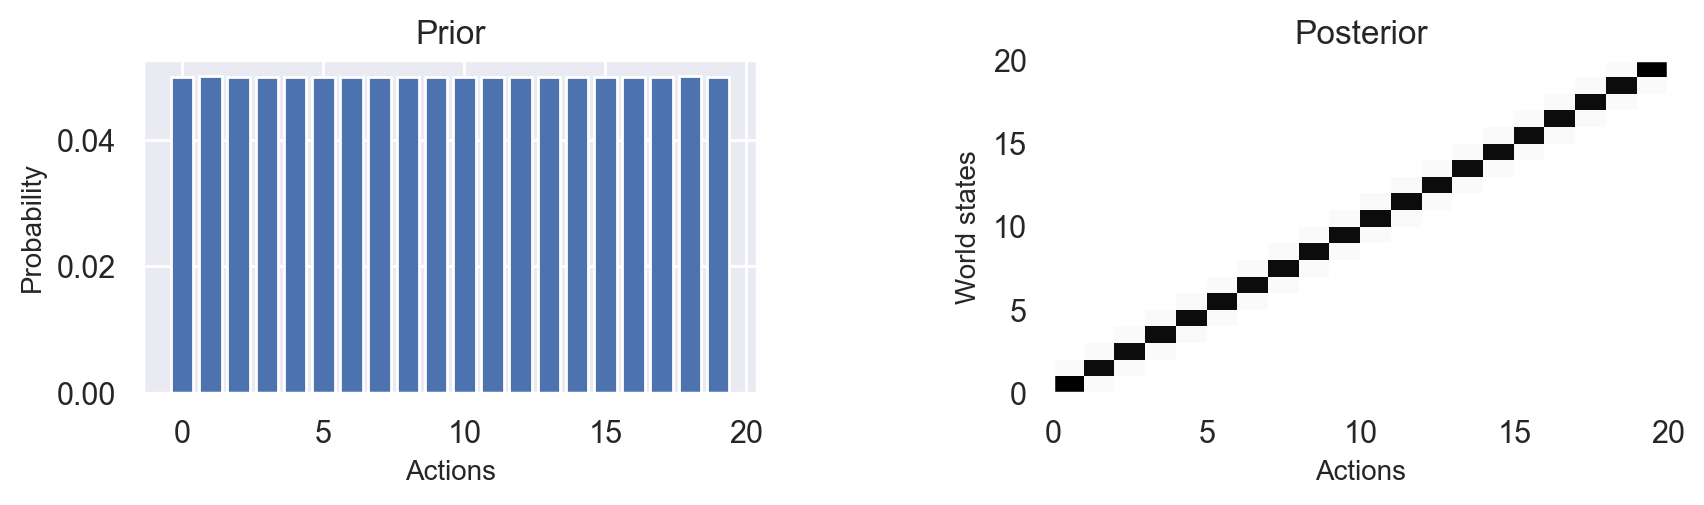

beta=100.0  ==>  DKL=3.844, EU=0.998, FE=0.959


In [69]:
beta = 100.0
pa,pagw = Blahut_Arimoto_iterations(U,beta)
show_prior_and_posterior(pa,pagw)

# calc and print stats
DKL = pr.sum(pw*pagw*pr.log(pagw/pa)).val/np.log(2)   # average information-processing costs
EU = pr.sum(pw*pagw*U).val                            # expected utility
FE = EU - DKL/beta                                    # free energy
print("beta={}  ==>  DKL={:.3f}, EU={:.3f}, FE={:.3f}".format(beta,DKL,EU,FE))

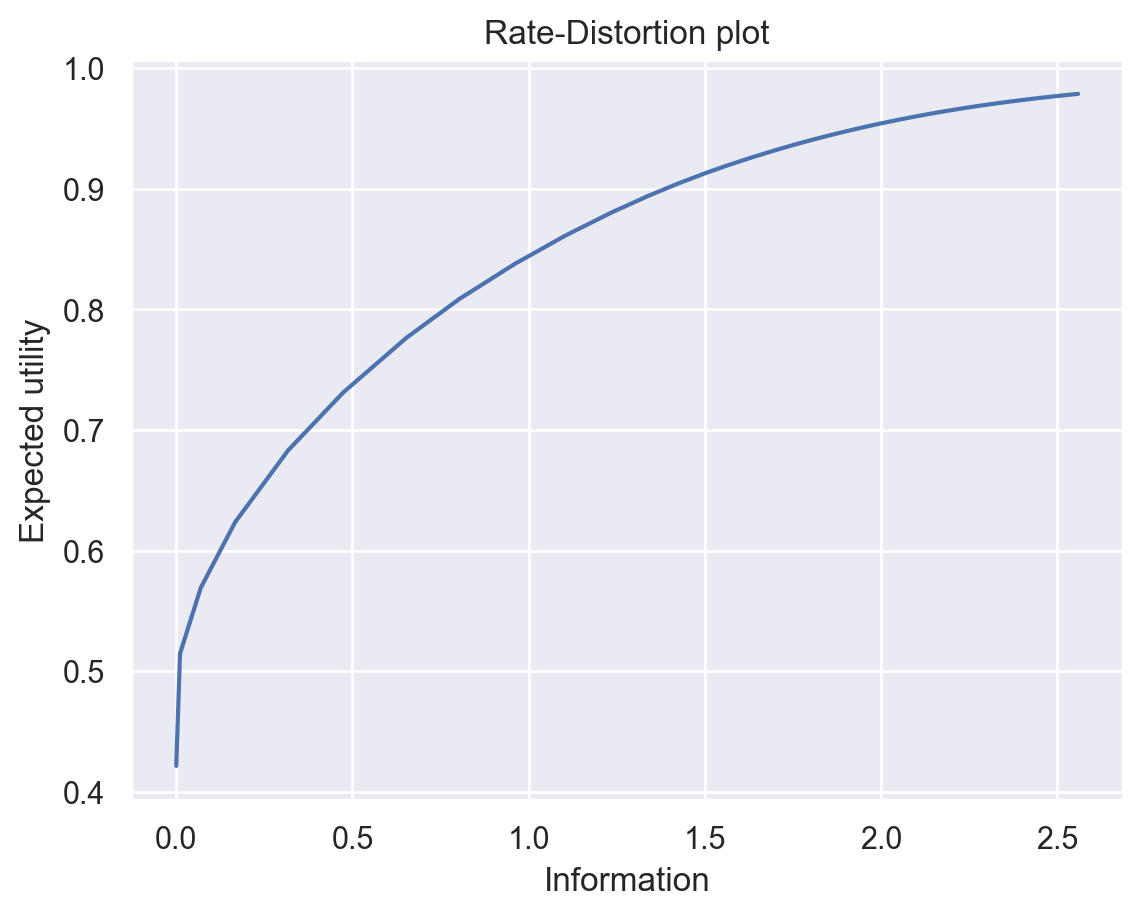

In [85]:
DKLs = []
EUs = []

for beta in np.arange(0,25,0.5):
    pa,pagw = Blahut_Arimoto_iterations(U,beta)
    DKLs.append(pr.sum(pw*pagw*pr.log(pagw/pa)).val/np.log(2))
    EUs.append(pr.sum(pw*pagw*U).val)                       
    
plt.title('Rate-Distortion plot')
plt.plot(DKLs,EUs)
plt.xlabel('Information')
plt.ylabel('Expected utility')
plt.show()